In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [53]:
df =pd.read_csv("/Users/da-m1-40/Downloads/Final_Market.csv")
df

,Unnamed: 0,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day,Selling_Price
0,0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020/03/10,108.0,112.0,3236.0,29,348.0,0,9.3,2020,3,10,111.5862069
1,1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020/09/09,150.0,170.0,51710.0,332,6075.6,822,8.51,2020,9,9,155.753012
2,2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020/05/05,70.0,80.0,4860.0,66,1320.0,50,3.68,2020,5,5,73.63636364
3,3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020/01/20,60.0,60.0,600.0,10,90.0,0,6.67,2020,1,20,60
4,4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020/07/14,40.0,45.0,41530.0,927,9270.0,393,4.48,2020,7,14,44.8004315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64371,64371,TRANSVAAL,AG100,1M,10.0,ONIONS MILD,2020/05/18,70.0,75.0,19695.0,281,2810.0,3583,7.01,2020,5,18,70.08896797
64372,64372,IMPORTS - OUTSIDE RSA,BC180,X,18.0,BANANA,2020/02/05,160.0,220.0,13560.0,72,1296.0,887,10.46,2020,2,5,188.3333333
64373,64373,TRANSVAAL,TS035,1M,3.5,TOMATOES-LONG LIFE,2020/08/20,20.0,20.0,6000.0,300,1050.0,900,5.71,2020,8,20,20
64374,64374,NATAL,BJ100,2M,10.0,LEMON,2020/08/18,50.0,80.0,16730.0,277,2770.0,372,6.04,2020,8,18,60.39711191


In [54]:
df.drop(columns=['Unnamed: 0', 'year','day','month','Selling_Price'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 6.4+ MB


In [55]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.strftime('%B')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          64376 non-null  object        
 1   Container         64376 non-null  object        
 2   Size_Grade        64376 non-null  object        
 3   Weight_Kg         64376 non-null  float64       
 4   Commodities       64376 non-null  object        
 5   Date              64376 non-null  datetime64[ns]
 6   Low_Price         64376 non-null  float64       
 7   High_Price        64376 non-null  float64       
 8   Sales_Total       64376 non-null  float64       
 9   Total_Qty_Sold    64376 non-null  int64         
 10  Total_Kg_Sold     64376 non-null  float64       
 11  Stock_On_Hand     64376 non-null  int64         
 12  avg_price_per_kg  64376 non-null  object        
 13  month             64376 non-null  object        
dtypes: datetime64[ns](1), 

In [56]:
df['avg_price_per_kg'] = pd.to_numeric(df['avg_price_per_kg'], errors='coerce')

In [57]:
df.drop(columns=['Date'], inplace=True)

In [58]:
df1 = df[df['Commodities'] == 'TOMATOES-LONG LIFE']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3849 entries, 3 to 64373
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          3849 non-null   object 
 1   Container         3849 non-null   object 
 2   Size_Grade        3849 non-null   object 
 3   Weight_Kg         3849 non-null   float64
 4   Commodities       3849 non-null   object 
 5   Low_Price         3849 non-null   float64
 6   High_Price        3849 non-null   float64
 7   Sales_Total       3849 non-null   float64
 8   Total_Qty_Sold    3849 non-null   int64  
 9   Total_Kg_Sold     3849 non-null   float64
 10  Stock_On_Hand     3849 non-null   int64  
 11  avg_price_per_kg  3849 non-null   float64
 12  month             3849 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 421.0+ KB


In [59]:
df1["Weight_Kg"].value_counts()

Weight_Kg
6.0     1751
1.0      553
5.0      388
9.0      380
20.0     368
3.5      123
2.0      120
0.5      104
10.0      50
4.0        8
16.0       2
7.0        2
Name: count, dtype: int64

In [60]:
df1

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,60.0,60.0,600.0,10,90.0,0,6.67,January
5,TRANSVAAL,AP010,2M,1.0,TOMATOES-LONG LIFE,8.0,14.0,82576.0,8064,8064.0,485,10.24,February
52,NORTH EASTERN CAPE,BM050,1L,5.0,TOMATOES-LONG LIFE,35.0,50.0,15970.0,453,2265.0,297,7.05,February
64,TRANSVAAL,KR200,4M,20.0,TOMATOES-LONG LIFE,120.0,120.0,480.0,4,80.0,76,6.00,April
89,TRANSVAAL,KR200,2M,20.0,TOMATOES-LONG LIFE,140.0,140.0,3780.0,27,540.0,0,7.00,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64302,KWAZULU NATAL,KR200,1R,20.0,TOMATOES-LONG LIFE,115.0,115.0,5750.0,50,1000.0,0,5.75,September
64346,TRANSVAAL,AP010,1R,1.0,TOMATOES-LONG LIFE,7.0,12.0,46640.0,5500,5500.0,660,8.48,March
64358,TRANSVAAL,NP005,2S,0.5,TOMATOES-LONG LIFE,5.0,10.0,5460.0,1080,540.0,0,10.11,December
64365,TRANSVAAL,BS060,3Z,6.0,TOMATOES-LONG LIFE,30.0,35.0,16570.0,518,3108.0,332,5.33,January


In [61]:
# Apply label encoding to each categorical column
label_encoder = LabelEncoder()
for column in df1.select_dtypes(include=['object']).columns:
    df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])

# Convert encoded columns to int
for column in df1.select_dtypes(include=['int64']).columns:
    df1[column] = df1[column].astype(int)

# Print DataFrame with encoded columns as int
print(df1.dtypes)
df1.head(6)

Province                object
Container               object
Size_Grade              object
Weight_Kg              float64
Commodities             object
Low_Price              float64
High_Price             float64
Sales_Total            float64
Total_Qty_Sold           int64
Total_Kg_Sold          float64
Stock_On_Hand            int64
avg_price_per_kg       float64
month                   object
Province_encoded         int64
Container_encoded        int64
Size_Grade_encoded       int64
Commodities_encoded      int64
month_encoded            int64
dtype: object


/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_8070/2710871175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])
/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_8070/2710871175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])
/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_8070/2710871175.py:4: SettingWithCopyWarning: 
A value is tryin

,Province,Container,Size_Grade,Weight_Kg,Commodities,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,month,Province_encoded,Container_encoded,Size_Grade_encoded,Commodities_encoded,month_encoded
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,60.0,60.0,600.0,10,90.0,0,6.67,January,6,6,0,0,4
5,TRANSVAAL,AP010,2M,1.0,TOMATOES-LONG LIFE,8.0,14.0,82576.0,8064,8064.0,485,10.24,February,6,3,8,0,3
52,NORTH EASTERN CAPE,BM050,1L,5.0,TOMATOES-LONG LIFE,35.0,50.0,15970.0,453,2265.0,297,7.05,February,5,7,0,0,3
64,TRANSVAAL,KR200,4M,20.0,TOMATOES-LONG LIFE,120.0,120.0,480.0,4,80.0,76,6.00,April,6,10,19,0,0
89,TRANSVAAL,KR200,2M,20.0,TOMATOES-LONG LIFE,140.0,140.0,3780.0,27,540.0,0,7.00,July,6,10,8,0,5
91,TRANSVAAL,AP010,1M,1.0,TOMATOES-LONG LIFE,6.0,6.5,26840.0,4400,4400.0,0,6.10,January,6,3,1,0,4


In [77]:
df1.head(2)

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province,Container,Size_Grade,Commodities_encoded,Month
52,5.0,35.0,50.0,15970.0,453,2265.0,297,7.05,5,7,0,0,3
108,6.0,45.0,45.0,14040.0,312,1872.0,0,7.50,6,8,10,0,3


In [63]:
df1.drop(columns=df1.select_dtypes(include=['object']).columns, inplace=True)

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_8070/1306521620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=df1.select_dtypes(include=['object']).columns, inplace=True)


In [64]:
# Method 2: Interquartile Range (IQR)
# Calculate IQR for each column
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean array indicating whether each value is an outlier
outlier_mask_iqr = ((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove rows containing outliers
df1 = df1[~outlier_mask_iqr]
df1

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_encoded,Container_encoded,Size_Grade_encoded,Commodities_encoded,month_encoded
52,5.0,35.0,50.0,15970.0,453,2265.0,297,7.05,5,7,0,0,3
108,6.0,45.0,45.0,14040.0,312,1872.0,0,7.50,6,8,10,0,3
131,6.0,40.0,50.0,35985.0,789,4734.0,453,7.60,6,8,1,0,1
167,5.0,20.0,20.0,1140.0,57,285.0,0,4.00,5,7,3,0,4
173,6.0,50.0,72.0,9758.0,156,936.0,0,10.43,6,8,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64032,6.0,20.0,22.0,6440.0,316,1896.0,468,3.40,6,8,15,0,1
64097,6.0,22.0,45.0,25162.0,1025,6150.0,170,4.09,6,8,14,0,5
64132,6.0,70.0,84.0,37501.0,506,3036.0,360,12.35,6,8,1,0,8
64284,6.0,55.0,65.0,17820.0,312,1872.0,0,9.52,6,8,2,0,6


In [65]:
df1["Container_encoded"].unique()

array([7, 8, 9])

In [66]:
df1.rename(columns={'Province_encoded': 'Province', 'Container_encoded': 'Container', 'Size_Grade_encoded': 'Size_Grade','month_encoded':'Month'}, inplace=True)

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_8070/3239899238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Province_encoded': 'Province', 'Container_encoded': 'Container', 'Size_Grade_encoded': 'Size_Grade','month_encoded':'Month'}, inplace=True)


In [67]:
X = df1.drop(columns=['avg_price_per_kg'])  
y = df1['avg_price_per_kg'] 

In [68]:
df1.corr()[['avg_price_per_kg']].sort_values(by='avg_price_per_kg', ascending=False)

,avg_price_per_kg
avg_price_per_kg,1.000000
Low_Price,0.910612
High_Price,0.901921
Sales_Total,0.317448
Container,0.203913
Weight_Kg,0.203913
Province,0.120702
Month,0.089977
Total_Kg_Sold,0.019359
Total_Qty_Sold,0.009314


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Features Correlating with Selling_Price')

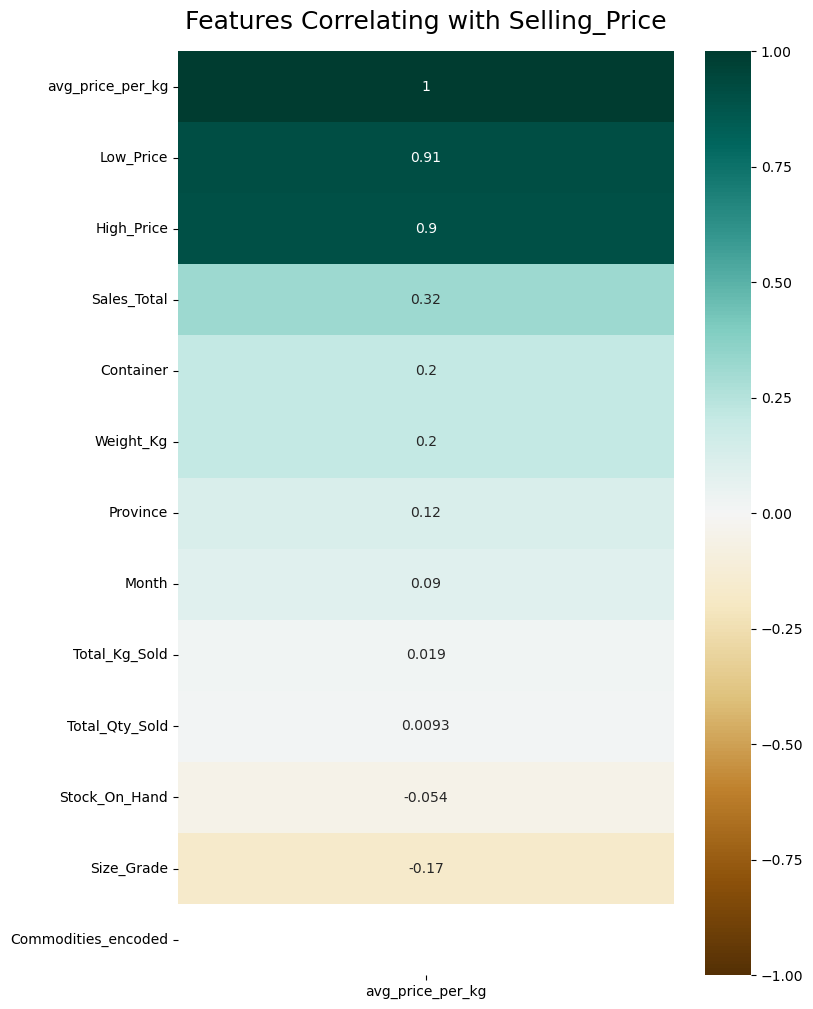

In [69]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df1.corr()[['avg_price_per_kg']].sort_values(by='avg_price_per_kg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Selling_Price', fontdict={'fontsize':18}, pad=16)

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def backward_elimination_sklearn(X, y, n_features_to_select=None):
    # Create a linear regression model
    estimator = LinearRegression()
    
    # Initialize RFE
    selector = RFE(estimator, n_features_to_select=n_features_to_select, step=1)
    
    # Fit RFE
    selector = selector.fit(X, y)
    
    # Get selected features
    selected_features = X.columns[selector.support_]
    
    return selected_features


# Assuming X contains your features and y contains your target variable
# X and y should be DataFrames or arrays
# Perform backward elimination
selected_features = backward_elimination_sklearn(X, y)

# Train your model with the selected features
X_selected = X[selected_features]
model = LinearRegression().fit(X_selected, y)

# Print selected features
print("Selected Features:", selected_features.tolist())

# Print model coefficients
print("Model Coefficients:", model.coef_)


Selected Features: ['Weight_Kg', 'Low_Price', 'High_Price', 'Province', 'Container', 'Month']
Model Coefficients: [-0.63888532  0.08422097  0.08787028  0.02301316 -0.63888532 -0.01081867]


In [71]:
X.drop(columns=['Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'Commodities_encoded'], inplace=True)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Model Creation
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate Mean Squared Error (MSE) for training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE) for training data
rmse_train = np.sqrt(mse_train)

# Calculate Mean Absolute Error (MAE) for training data
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared for training data
r2_train = r2_score(y_train, y_train_pred)

print("Training Metrics:")
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)

Training Metrics:
Mean Squared Error: 0.34703475067838757
Root Mean Squared Error: 0.5890965546312316
Mean Absolute Error: 0.3988418459512478
R-squared: 0.9478055150912784


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Model Creation
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.43437509801412827
Root Mean Squared Error: 0.6590713906809552
Mean Absolute Error: 0.4121371491322967
R-squared: 0.9325815540234395


In [74]:
# Assuming `X_train` is the dataset used for training the model
feature_names = X_train.columns.tolist()
num_features = len(feature_names)

print("Number of features:", num_features)
print("Feature names:", feature_names)

Number of features: 7
Feature names: ['Weight_Kg', 'Low_Price', 'High_Price', 'Province', 'Container', 'Size_Grade', 'Month']


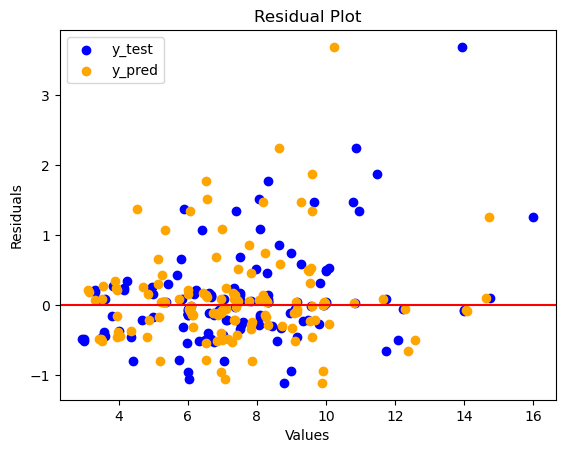

In [75]:
residuals = y_test - y_pred

# Scatter plot of residuals for y_test
plt.scatter(y_test, residuals, color='blue', label='y_test')
# Scatter plot of residuals for y_pred
plt.scatter(y_pred, residuals, color='orange', label='y_pred')

plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel("Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

In [76]:
import pickle

# #Saving the model
# with open('mlra.pkl', 'wb') as file:
#     pickle.dump(model, file)

# # Loading the model
# with open('mlra.pkl', 'rb') as file:
#     clf = pickle.load(file)

# # Making a prediction using the loaded model
# prediction = clf.predict([[5, 50, 3, 6, 9, 10,5]])

# # Displaying the prediction
# print(prediction)